o 데이터 불러오기

In [63]:
import pandas as pd #Analysis 
from pandas import DataFrame
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [64]:
df = pd.read_csv('D:/workplace/train.csv')
df.shape
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


o 데이터 타입

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

o response varible 양상 파악

In [66]:
df['SalePrice'].describe()#데이터 수가 1459로 수가 많지는 않다

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

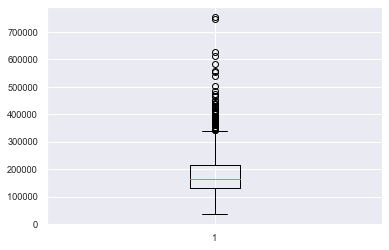

In [67]:
plt.boxplot(df['SalePrice'][df['SalePrice'].notna()])
plt.show()

<AxesSubplot:xlabel='SalePrice'>

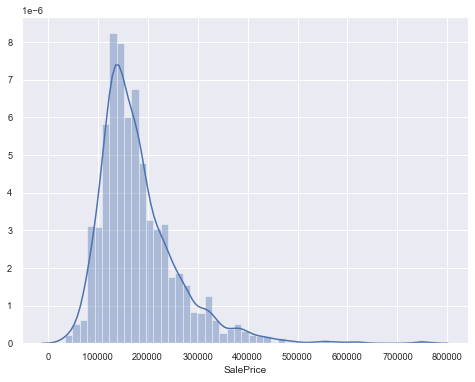

In [68]:
plt.subplots(figsize=(8,6))
sns.distplot(df['SalePrice']) #값이 대부분 1.5정도에 형성이 되어있다

In [69]:
print('왜도 : %f' % df['SalePrice'].skew())# 오른쪽 꼬리가 길수록 값이 큼, 현재는 왼쪽으로 치우쳐져 있음
print('첨도 : %f' % df['SalePrice'].kurt()) # 값이 3에 가까울수록 정규분포에 가까움
# 첨도(>3): 뾰족한 분포, <3 : 평탄한 분포

왜도 : 1.882876
첨도 : 6.536282


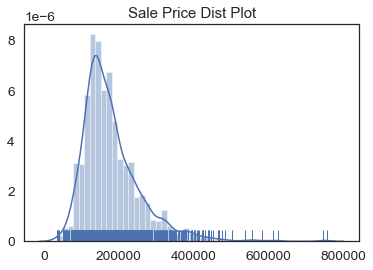

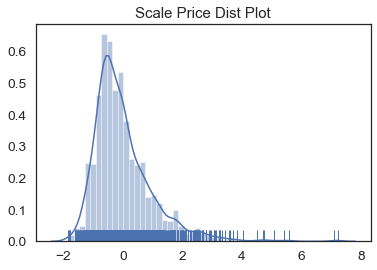

In [98]:
#normalization 확인
#sale price는 수치형으로 response variable이 정규분포일 때 더 잘 작동함

x=df.SalePrice.values
scaler = StandardScaler()

sns.distplot(x,kde=True, rug = True)
plt.title("Sale Price Dist Plot")
plt.show()

scale_price = scaler.fit_transform(df['SalePrice'].values.reshape(-1,1))
sns.distplot(scale_price,kde=True, rug = True)
plt.title("Scale Price Dist Plot")
plt.show()

#분포 자체는 정규분포이므로 정규화 진행해도 다르지 않음. 스케일 조정 시도

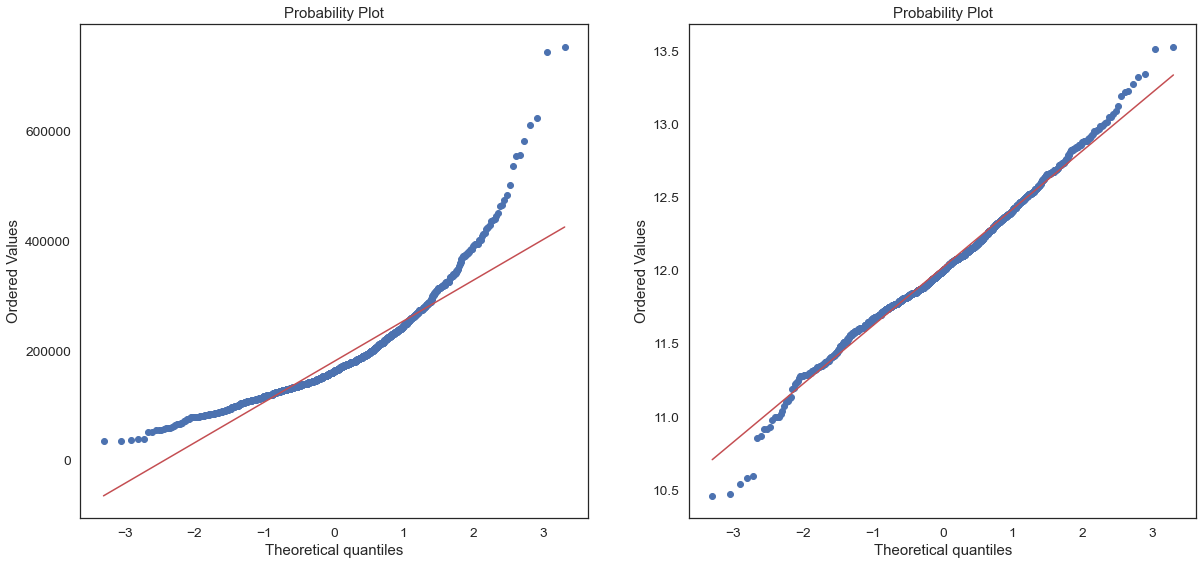

In [99]:
# normal test(q-q plot)

#아래서는 log scale로 변환시 정규화됨

norm = plt.figure(figsize = (20,20))

norm.add_subplot(2,2,1)
plt_orginal = stats.probplot(df['SalePrice'], plot=plt)

norm.add_subplot(2,2,2)
plt_log = stats.probplot(np.log1p(df['SalePrice']), plot=plt)

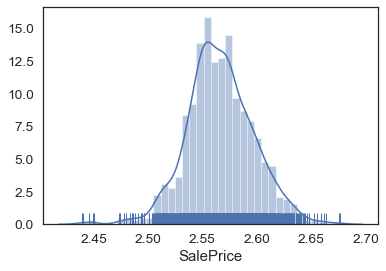

In [101]:
df['SalePrice'] = np.log1p(df['SalePrice'])

sns.distplot(df['SalePrice'],kde=True, rug = True)
plt.show()

In [102]:
df['SalePrice'].describe()

count    1460.000000
mean        2.566329
std         0.030660
min         2.438886
25%         2.547498
50%         2.565066
75%         2.585787
max         2.676523
Name: SalePrice, dtype: float64

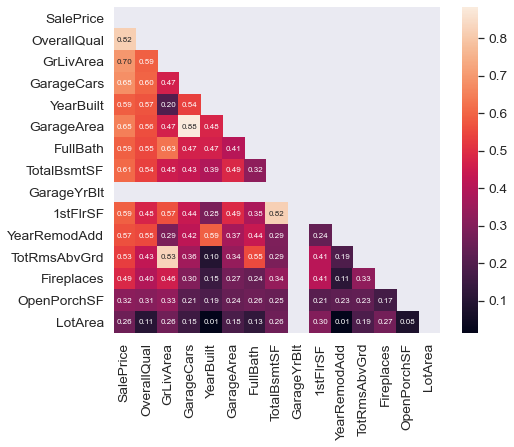

In [110]:
#상관관계 확인

#pearson : numeric한 변수에 대해 사용하는 상관관계
#spearman : categorical 변수에 대해서도 사용가능한 상관관계

k = 15 
corrmat = abs(df.corr(method='spearman')) 
cols = corrmat.nlargest(k, 'SalePrice').index 
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))


mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()

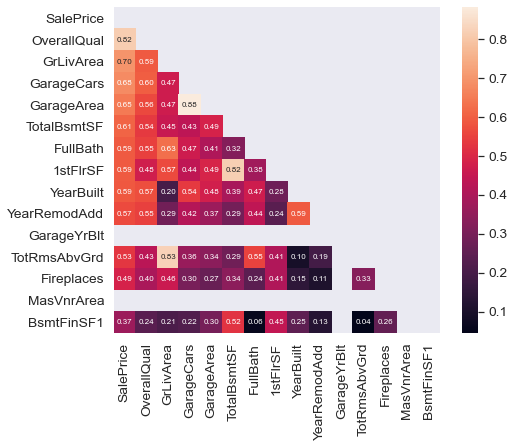

In [124]:
#pearson
#spearman이랑 다름 

k = 15 
corrmat_p = abs(df.corr(method='pearson')) 
cols_p = corrmat_p.nlargest(k, 'SalePrice').index 
cm_p = np.corrcoef(df[cols_p].values.T) 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))


mask_p = np.zeros_like(cm_p) 
mask_p[np.triu_indices_from(mask_p)] = True 
sns.set_style("white")
hm_p = sns.heatmap(cm_p, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols_p.values, xticklabels=cols_p.values, mask = mask_p)
plt.show()

▶ 관계 있는 변수

- OverallQual : 주택의 전반적인 상태 평가
- GrLivArea : 지상 거실 면적
- GarageCars : 주차장 수용량 
- GarageArea : 주차장 면적
- TotalBsmtSF : 지하실 면적
- 1stFlrSF : 1층 면적
- FullBath : 완전한 욕실
- TotRmsAbvGrd : 욕실 제외 방 수
- YearBuilt : 원 시공일

o 상관관계 변수 확인

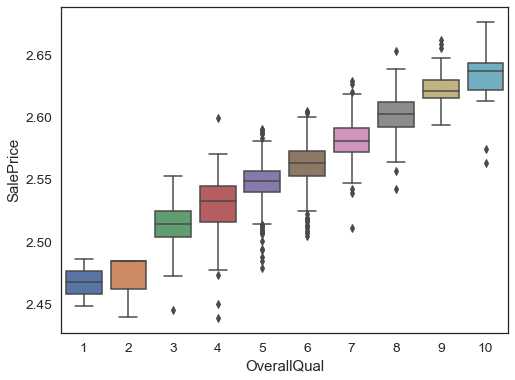

In [128]:
#overall qual과 가격 비교

overall = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=overall)

#결과적으로 quality가 높을수록 가격이 오름을 알 수 있음

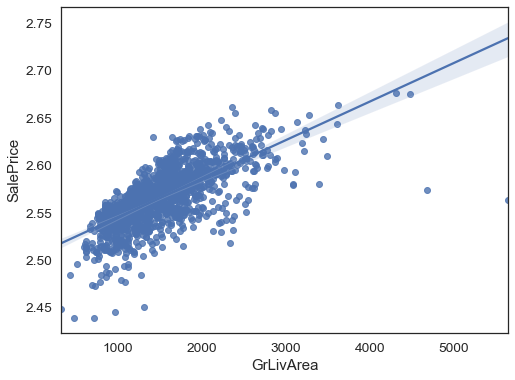

In [138]:
#GrLivArea : 지상 거실 면적과 price 관계

gr = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=gr)

# 보통 크면 가격이 높은데 두개만 이상함

In [142]:
df[(df['GrLivArea']>4200)]
#다른 부분: 비쌀수록 LandContour(평탄도) 거의 평탄함, Sale Type (판매 유형) 보증 증서가 있음

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,2.574653
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,2.676523
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,2.675606
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,2.563636


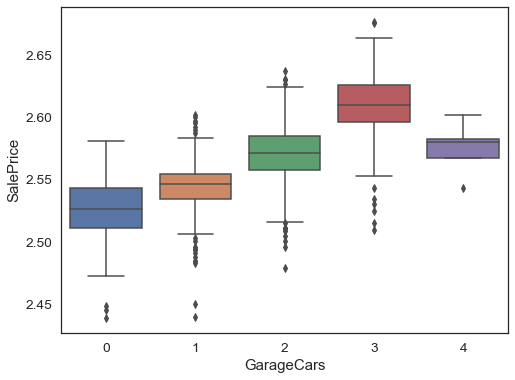

In [144]:
#GarageCars : 주차장 수용량

gc = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=gc)

#주차장 수용량이 4대일 때, 오히려 주는 경향이 있음

In [147]:
df[(df['GarageCars']==3)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.553297
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.597433
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,2.621134
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,2.605704
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,2.616849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,2.570907
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,2.620071
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,2.630858
1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,2.613324


In [148]:
df[(df['GarageCars']==4)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,421,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,2.583023
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,2.602036
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,2.567387
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,2.543171
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,2.580677


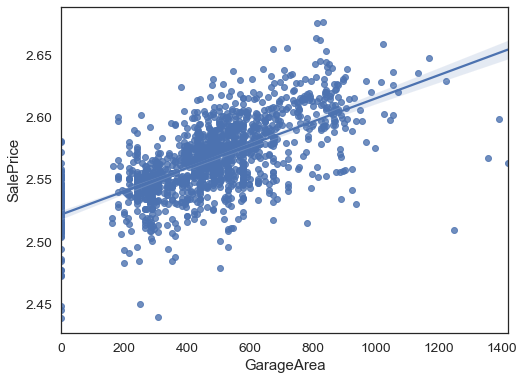

In [150]:
#GarageArea : 주차장 면적

ga = pd.concat([df['SalePrice'], df['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=ga)

# 0인 값들이 많음

In [151]:
df[(df['GarageArea']==0)]
#값들을 봐도 이상한 부분은 없음, 모르는 걸수도 있다고 생각함

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,2.510776
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,2.536483
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,2.551325
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,2.513690
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.543554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.542529
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,2.535779
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,2.520077
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,2.551039


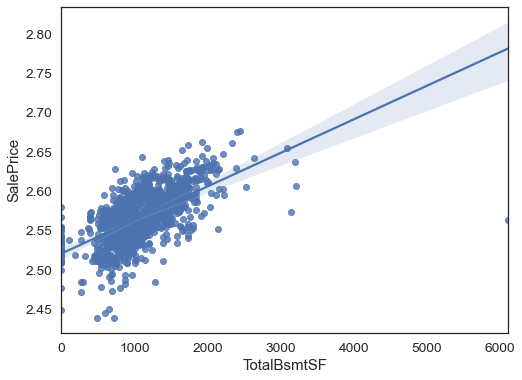

In [153]:
#TotalBsmtSF과 가격 비교

tb = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=tb)

In [159]:
df.groupby('TotalBsmtSF').size() 
#37개가 0 결측치 수와 같음 즉, 지하실이 없어서 0으로 표기

TotalBsmtSF
0       37
105      1
190      1
264      3
270      1
        ..
3094     1
3138     1
3200     1
3206     1
6110     1
Length: 721, dtype: int64

In [164]:
#6000 넘는 outlier 확인
df[(df['TotalBsmtSF']>6000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,2.563636


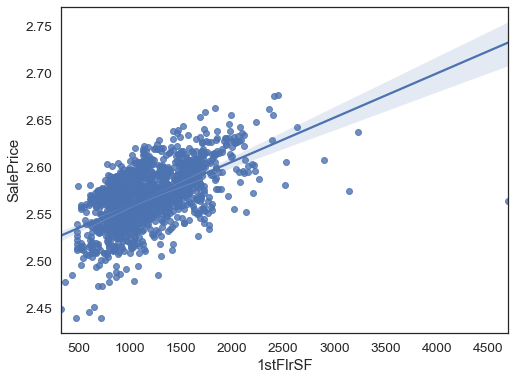

In [168]:
#1stFlrSF(일층 면적)와 가격비교

floor = pd.concat([df['SalePrice'], df['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=floor)

#TotalBsmtSF랑 비슷한 양상 띔

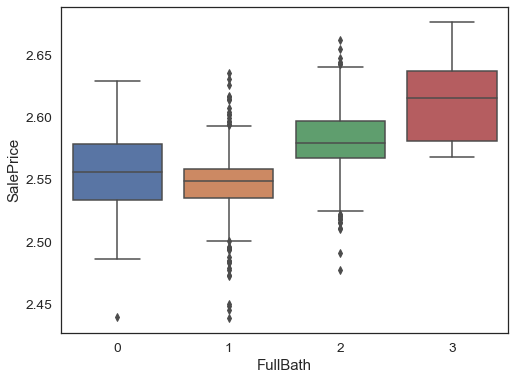

In [169]:
# FullBath : 완전한 욕실

fb = pd.concat([df['SalePrice'], df['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=fb)

#0임에도 price가 낮지 않은 경우가 있음 (다른 bath 관련 변수 양상 확인 후, 체크)

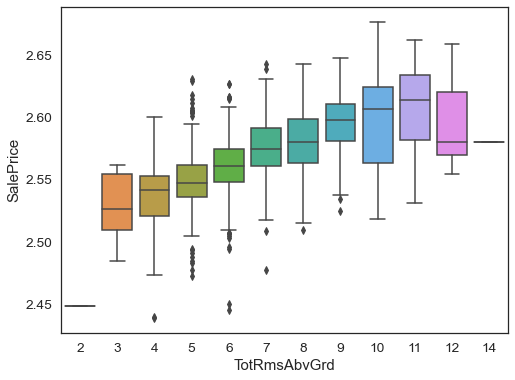

In [170]:
# TotRmsAbvGrd : 욕실 제외 방 수

to = pd.concat([df['SalePrice'], df['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=to)

# 욕실 제외한 방 수가 많을수록 가격이 오름(12,14)제외하고, 값이 전반적 상승함

In [171]:
df[(df['TotRmsAbvGrd']==12)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,2.644121
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2.652933
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,2.658568
897,898,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,2.554921
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.560838
1031,1032,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,2.579532
1173,1174,50,RL,138.0,18030,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,2.580866
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,2.576786
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,2.563636
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,2.580677


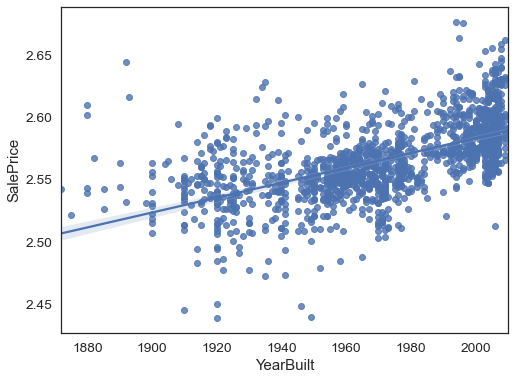

In [173]:
# YearBuilt : 원 시공일

yb = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=yb)

In [174]:
df.groupby('YearBuilt').size() 

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Length: 112, dtype: int64

o 이외 변수 확인

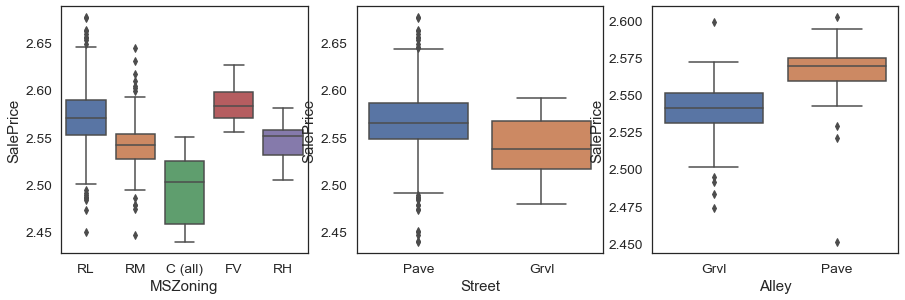

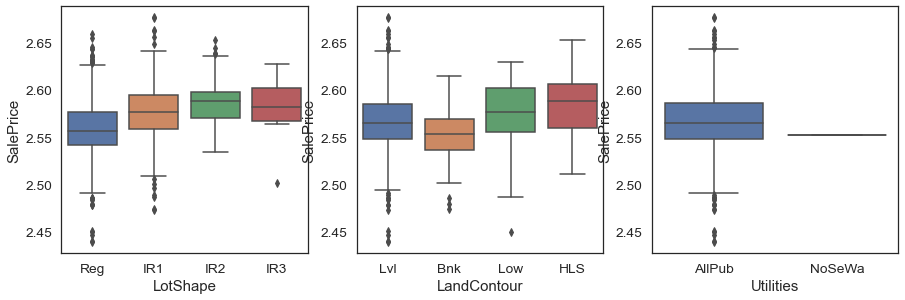

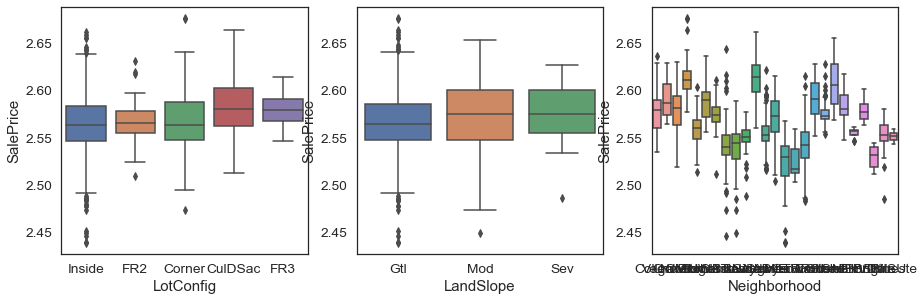

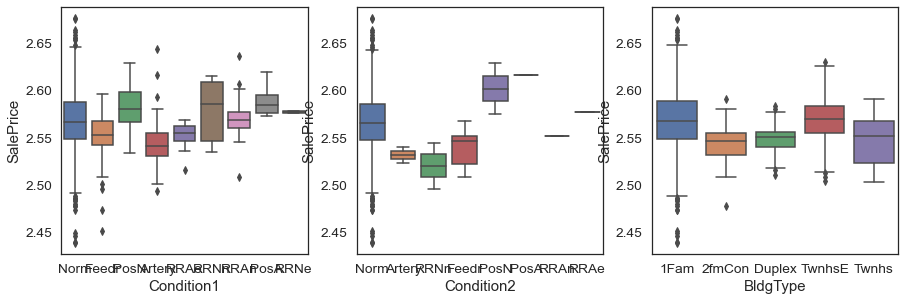

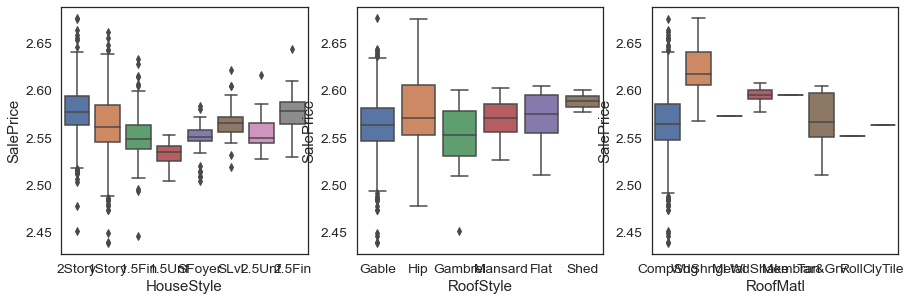

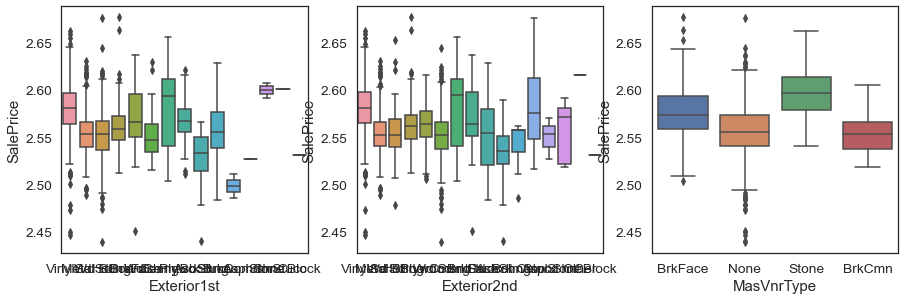

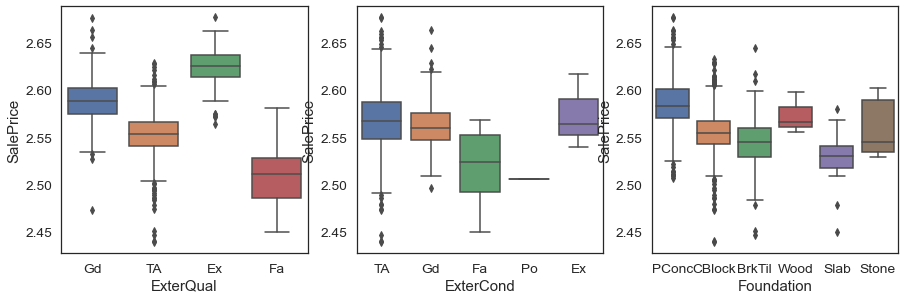

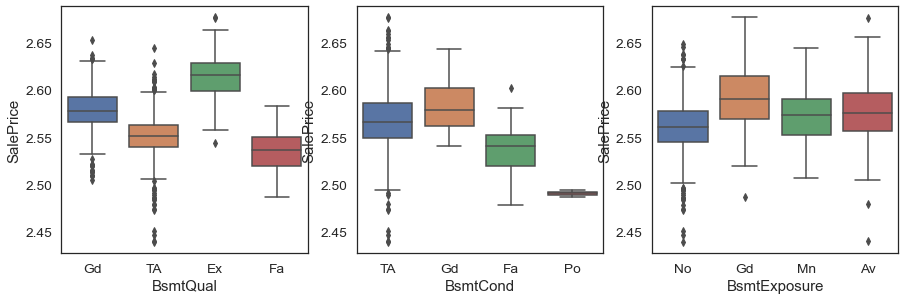

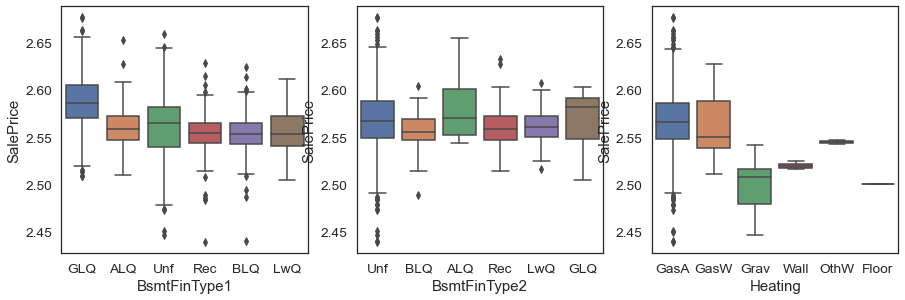

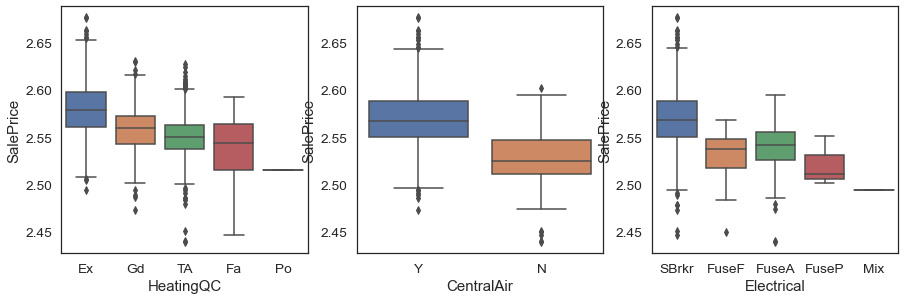

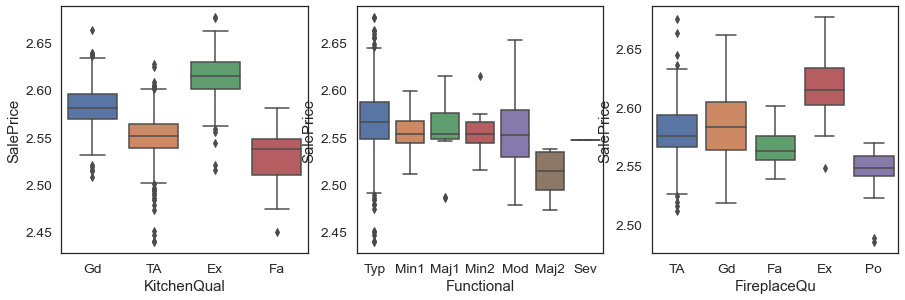

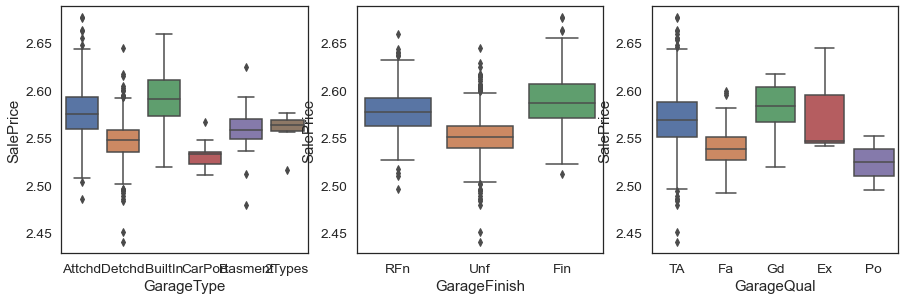

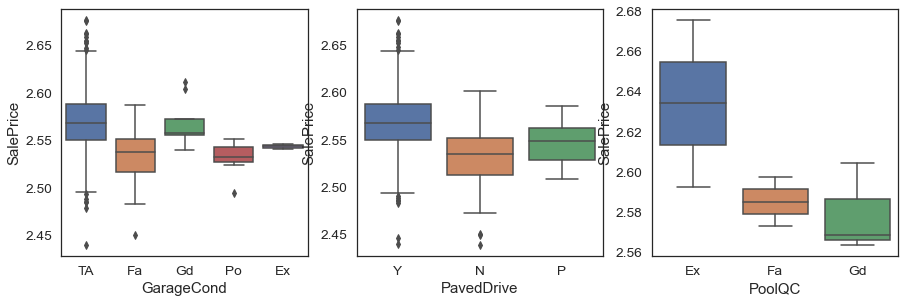

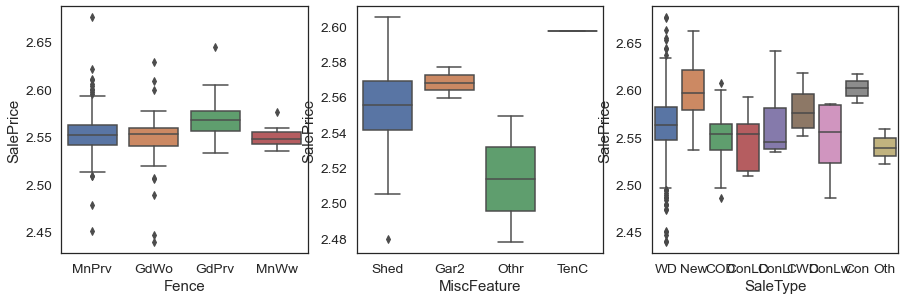

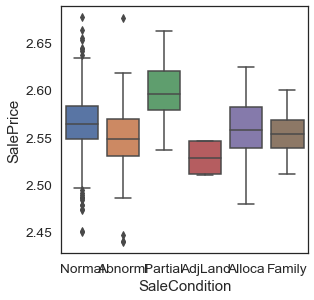

In [176]:
categorical= df.select_dtypes(include = ["object"]).columns

ix = 1

fig = plt.figure(figsize = (15,10))
for c in list(df[categorical]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df, x=c, y='SalePrice', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

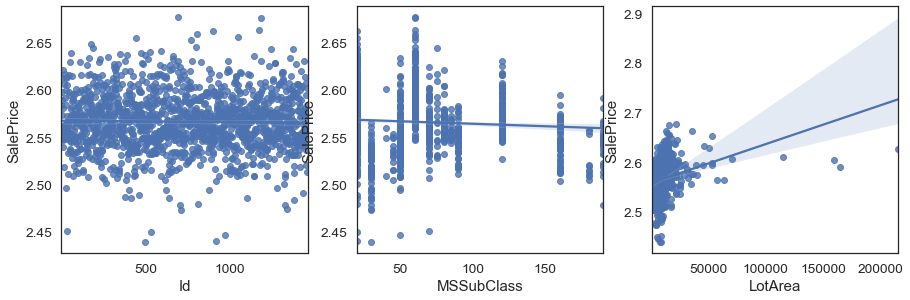

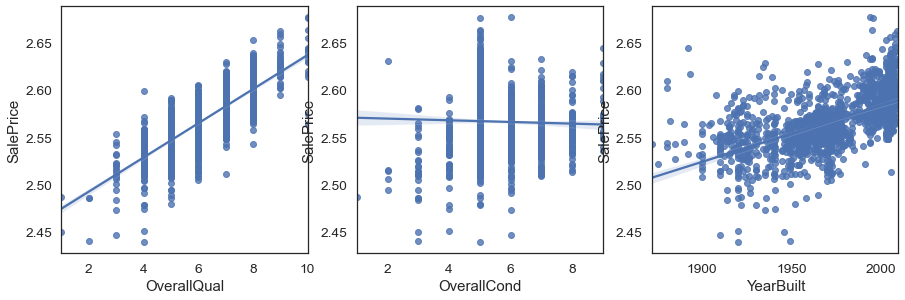

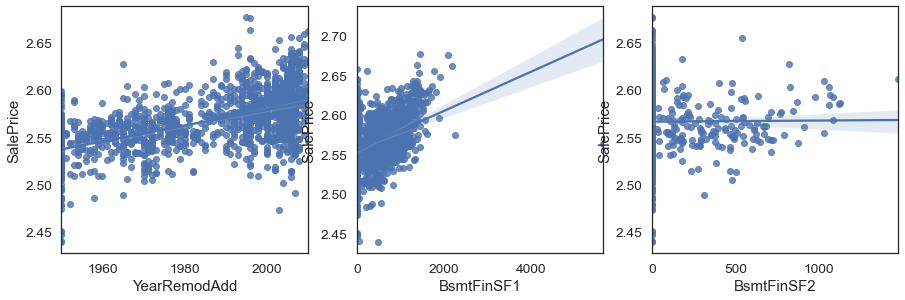

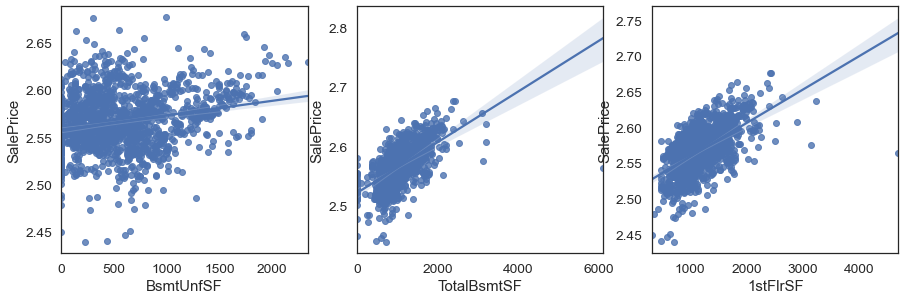

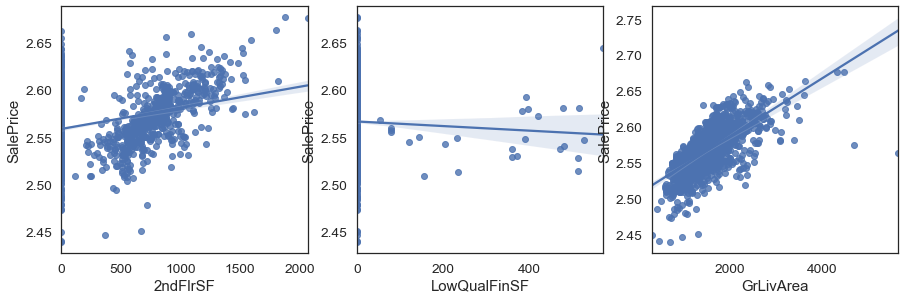

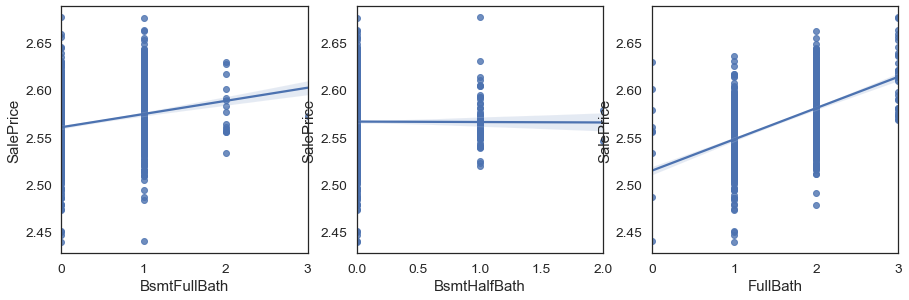

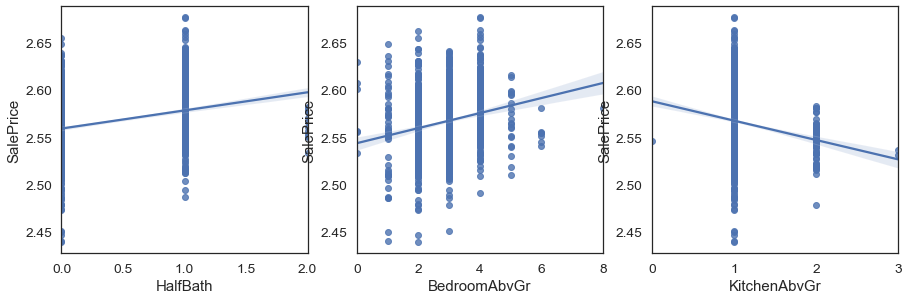

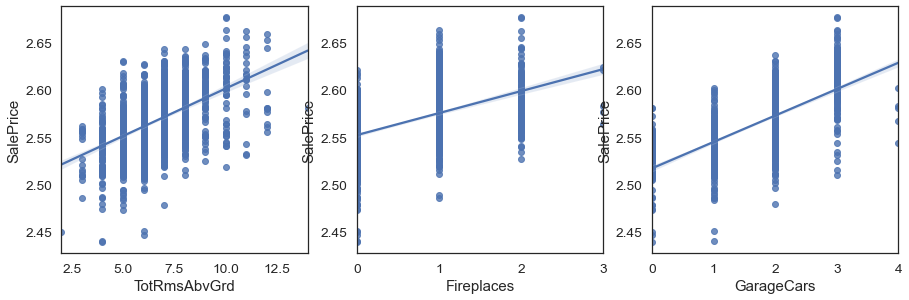

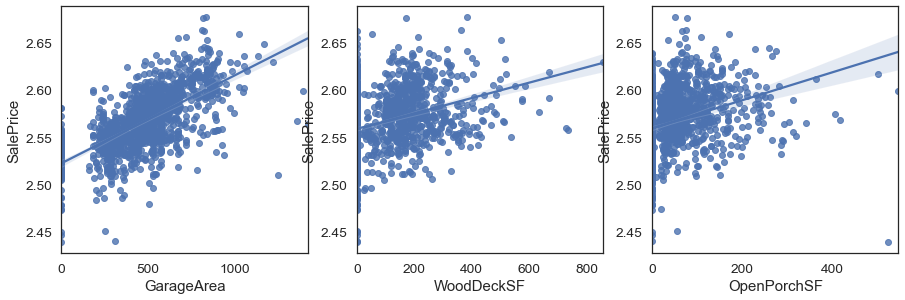

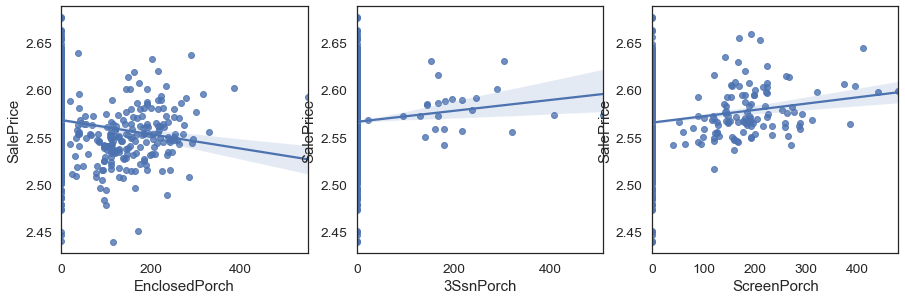

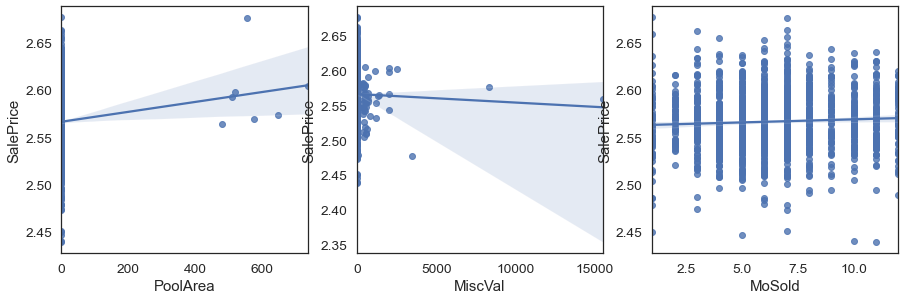

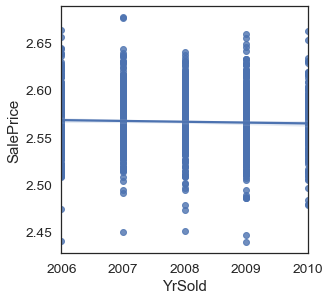

In [182]:
numeric= df.select_dtypes(include = ["int64"]).columns

ix_1 = 1

fig_1 = plt.figure(figsize = (15,10))

for c in list(df[numeric]):
    if ix_1 <= 3:
            ax2 = fig_1.add_subplot(2,3,ix_1+3)
            sns.regplot(data=df, x=c, y='SalePrice', ax=ax2)
            
    ix_1 = ix_1 + 1
    if ix_1 == 4: 
        fig_1 = plt.figure(figsize = (15,10))
        ix_1 =1
        
#half bath도 있는걸 보아 full bath와 half bath 합치면 값이 상관관계 조금 달라질듯함        

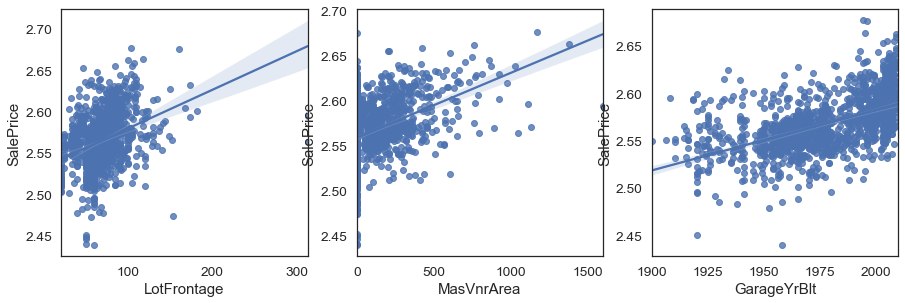

In [184]:
floa= df.select_dtypes(include = ["float64"]).columns

ix_2 = 1

fig_2 = plt.figure(figsize = (15,10))

for c in list(df[floa]):
    if ix_2 <= 3:
            ax2 = fig_2.add_subplot(2,3,ix_2+3)
            sns.regplot(data=df, x=c, y='SalePrice', ax=ax2)
            
    ix_2 = ix_2 + 1
    if ix_2 == 4: 
        break

o 결측치 확인

In [163]:
miss = df.isnull().sum().sort_values(ascending=False)
miss.head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

o 결측치 현황

 -r과반수 이상이 na임. none처리
 - PoolQC          1453 -> 거의 대부분이 결측치로 해당 변수 제거, 변수 사용 x
 - MiscFeature     1406 -> 거의 대부분이 결측치로 해당 변수 제거, 변수 사용 x
 - Alley           1369 -> 가격이 높을 수록 포장되어있는 양상 보임. 변수 사용o
 - Fence           1179 -> 뚜렷한 양상은 보이지 않음. 해당 변수 사용 x
 
 - FireplaceQu      690 -> 가격 낮을수록 poor에 많이 분포. 변수 사용o
 - LotFrontage      259 -> 약한 상관관계가 있음. 우선 평균 사용. 변수 사용 o
 
-garage관련은 없어서 null임,none 처리
 - GarageCond        81  -> 81인 값들 왜 데이터가 비었는지 양상 확인하기
 - GarageType        81
 - GarageYrBlt       81
 - GarageFinish      81
 - GarageQual        81


-BSMT는 없어서 null임, none 처리
 - BsmtExposure      38 
 - BsmtFinType2      38 
 - BsmtFinType1      37 
 - BsmtCond          37 
 - BsmtQual          37 
 
-적으므로 삭제
 - MasVnrArea         8 -> 0.5 상관관계 보임. 
 - MasVnrType         8 -> 변수 사용 x
 - Electrical         1 -> 적으므로 삭제, 변수 사용 x

In [190]:
df.groupby('GarageCars').size() #0이라서 null임

GarageCars
0     81
1    369
2    816
3    180
4      5
dtype: int64

In [191]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df['LotFrontage'] = df['LotFrontage'].fillna(0)

df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')

df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')

df = df.drop(df.loc[df['Electrical'].isnull()].index)
df = df.drop(df.loc[df['MasVnrArea'].isnull()].index)

miss = df.isnull().sum().sort_values(ascending=False)
miss.head(30)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
dtype: int64

o k-fold